In [1]:
import pandas as pd
import numpy as np
from ultralytics import YOLO
import torch

import shutil
import os

import random

from PIL import Image
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
source_folder = os.path.join('data', 'weed in crop')

# Test sources
test_source_images = os.path.join(source_folder, "test/images")
test_source_labels = os.path.join(source_folder, "test/labels")
test_destination_folder = 'datasets/working/test'
os.makedirs(test_destination_folder, exist_ok=True)

# Moving test images and labels
shutil.copytree(test_source_images, os.path.join(test_destination_folder, "images"))
shutil.copytree(test_source_labels, os.path.join(test_destination_folder, "labels"))

# Train sources
train_source_images = os.path.join(source_folder, "train/images")
train_source_labels = os.path.join(source_folder, "train/labels")
train_destination_folder = "datasets/working/train"
os.makedirs(train_destination_folder, exist_ok=True)

# Moving train images and labels
shutil.copytree(train_source_images, os.path.join(train_destination_folder, "images"))
shutil.copytree(train_source_labels, os.path.join(train_destination_folder, "labels"))

# Validation sources
valid_source_images = os.path.join(source_folder, "valid/images")
valid_source_labels = os.path.join(source_folder, "valid/labels")
valid_destination_folder = "datasets/working/valid"
os.makedirs(valid_destination_folder, exist_ok=True)

# Moving validation images and labels
shutil.copytree(valid_source_images, os.path.join(valid_destination_folder, "images"))
shutil.copytree(valid_source_labels, os.path.join(valid_destination_folder, "labels"))



FileExistsError: [Errno 17] File exists: 'datasets/working/test/images'

In [3]:
def move_files(file_path, source_folder, destination_folder):
    # Read a list of filenames
    with open(file_path, "r") as file:
        file_names = [os.path.basename(line.strip()) for line in file.readlines()]

    # Folder for images and labels
    images_folder = os.path.join(destination_folder, "images")
    labels_folder = os.path.join(destination_folder, "labels")
    
    # moving files
    for file_name in file_names:
        image_file = os.path.join(source_folder, file_name)
        label_file = os.path.join(source_folder, file_name.replace(".png", ".txt"))
        if os.path.isfile(image_file):
            shutil.copy(image_file, images_folder)
        if os.path.isfile(label_file):
            shutil.copy(label_file, labels_folder)

In [4]:
import yaml

dataset = {
    'train' : 'train',
    'val' : 'valid',
    'test' : 'test',
    'nc' : 2,
    'names' : ['crop', 'weed']
}

with open('datasets/working/dataset.yaml', 'w') as file:
    yaml.dump(dataset, file)


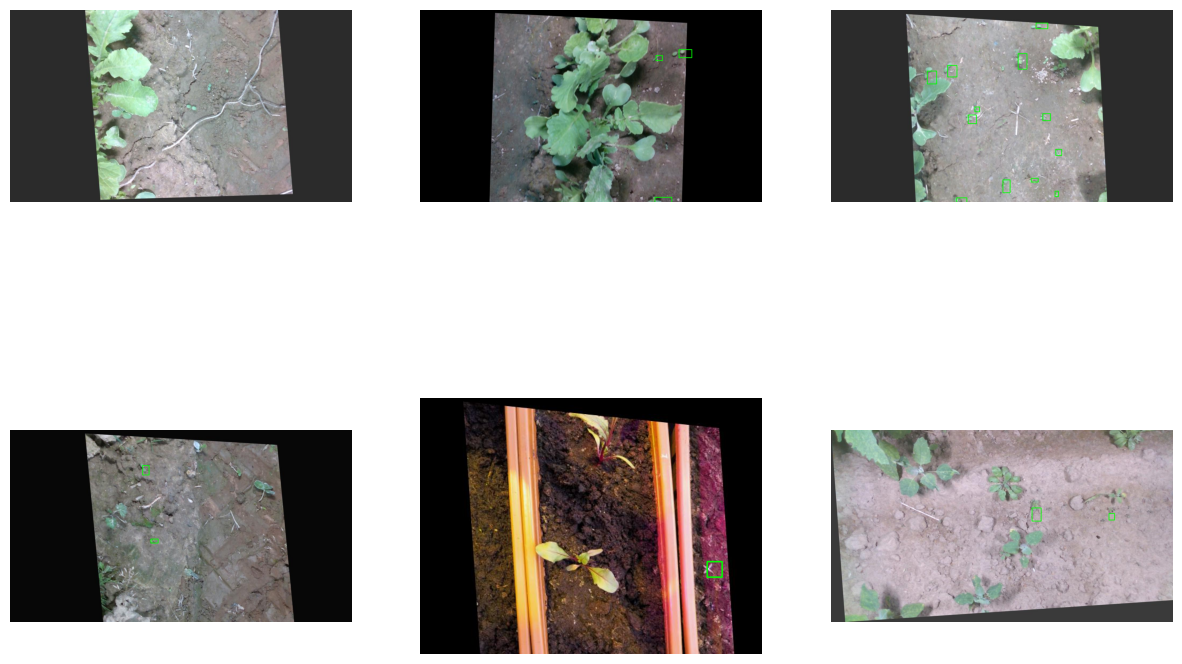

In [5]:
# Training images and labels
image_folder = 'datasets/working/train/images'
labels_folder = 'datasets/working/train/labels'

# Load list of image files
image_files = os.listdir(image_folder)

# Selecting random images
random.shuffle(image_files)
random_image_files = image_files[:6]

# Display random images with tags
num_images = len(random_image_files)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i in range(num_images):
    # Upload image
    image_file = os.path.join(image_folder, random_image_files[i])
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Load labels from file
    label_file = os.path.join(labels_folder, os.path.splitext(random_image_files[i])[0] + ".txt")
    with open(label_file, "r") as file:
        labels = file.readlines()

    # Display image with labels
    for label in labels:
        class_id, x, y, width, height = map(float, label.strip().split())
        x = int(x * image.shape[1])
        y = int(y * image.shape[0])
        width = int(width * image.shape[1])
        height = int(height * image.shape[0])
        cv2.rectangle(image, (x, y), (x + width, y + height), (0,255,0), 2)
    
    # Display image
    axes[i].imshow(image)
    axes[i].axis("off")

plt.tight_layout
plt.show()

In [6]:
import torch
if torch.backends.mps.is_available():
    device = torch.device("mps")
    x = torch.ones(1, device=device)
    print (x)
else:
    print ("MPS device not found.")

tensor([1.], device='mps:0')


In [7]:
model = YOLO('yolov8x.pt')

In [ ]:
!cd ~/stable-diffusion-webui; PYTORCH_MPS_HIGH_WATERMARK_RATIO=0.7 ./webui.sh --no-half

In [8]:
!pip install diffusers

In [10]:
!pip install ipywidgets

  Obtaining dependency information for ipywidgets from https://files.pythonhosted.org/packages/b8/d4/ce436660098b2f456e2b8fdf76d4f33cbc3766c874c4aa2f772c7a5e943f/ipywidgets-8.1.0-py3-none-any.whl.metadata
  Using cached ipywidgets-8.1.0-py3-none-any.whl.metadata (2.4 kB)
  Obtaining dependency information for widgetsnbextension~=4.0.7 from https://files.pythonhosted.org/packages/8e/d4/d31b12ac0b87e8cc9fdb6ea1eb6596de405eaaa2f25606aaa755d0eebbc0/widgetsnbextension-4.0.8-py3-none-any.whl.metadata
  Using cached widgetsnbextension-4.0.8-py3-none-any.whl.metadata (1.6 kB)
  Obtaining dependency information for jupyterlab-widgets~=3.0.7 from https://files.pythonhosted.org/packages/74/5e/2475ac62faf2e342b2bf20b8d8e375f49400ecb38f52e4e0a7557eb1cedb/jupyterlab_widgets-3.0.8-py3-none-any.whl.metadata
  Using cached jupyterlab_widgets-3.0.8-py3-none-any.whl.metadata (4.1 kB)
Using cached ipywidgets-8.1.0-py3-none-any.whl (139 kB)
Using cached jupyterlab_widgets-3.0.8-py3-none-any.whl (214 kB)
Us

In [11]:
from diffusers import StableDiffusionPipeline

os.environ["PYTORCH_MPS_HIGH_WATERMARK_RATIO"] = "0.7"
os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"

In [12]:
model.train (data='working/dataset.yaml', epochs=6, imgsz=int(640),
            optimizer = 'AdamW', lr0 = float(1e-3), 
            project = 'TG_YOLOv8x', name='Didi',
            batch = int(4), device='mps', seed=int(69))

Ultralytics YOLOv8.0.150 🚀 Python-3.8.17 torch-2.0.1 MPS (Apple M1 Pro)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=working/dataset.yaml, epochs=6, patience=50, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=mps, workers=8, project=TG_YOLOv8x, name=Didi, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=69, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=Fals

In [13]:
model.train (data='working/dataset.yaml', epochs=10, imgsz=640,
            optimizer = 'AdamW', lr0 = float(1e-3), 
            project = 'TG_YOLOv8x', name='Didi',
            batch = 2, device='mps', seed=int(69))

Ultralytics YOLOv8.0.150 🚀 Python-3.8.17 torch-2.0.1 MPS (Apple M1 Pro)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=working/dataset.yaml, epochs=10, patience=50, batch=2, imgsz=640, save=True, save_period=-1, cache=False, device=mps, workers=8, project=TG_YOLOv8x, name=Didi, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=69, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=Fal

RuntimeError: MPS backend out of memory (MPS allocated: 3.28 GB, other allocations: 14.84 GB, max allowed: 18.13 GB). Tried to allocate 15.62 MB on private pool. Use PYTORCH_MPS_HIGH_WATERMARK_RATIO=0.0 to disable upper limit for memory allocations (may cause system failure).